This is a short introduction into tensorflow. The goal for you is to be able to create your own neural networks at the end of this notebook. We are building a NN without any hidden layers.

Please fill in the gaps.

If you need any help, you can check out a toy example online:

https://gist.github.com/hussius/1534135a419bb0b957b9

As an additional task you can fix an error in the accuracy function.

# Import Libraries

In [1]:
from __future__ import division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

You might need to install the necessary libraries:
    
    sudo pip install sklearn numpy matplotlib math

# Create Data

In the Toy example, we have a two-dimensional data set: $(x_1,x_2) \in [-1,1] \times [-1,1]$. We want to train the network to output 1, if $x_1 + x_2 >= 1$. Otherwise, the network should output 0. Therefore, we are going to create a dataset with the corresponding labels. We furthermore divide the data into a training set and a test set.

In the following code, you do not need to do anything. However, you should understand what I am doing.

In [3]:
# Define total number of samples
# E.g.we're making 1000 samples
tot_number_samples = 10000

# Create a dataset randomly and calculate the necessary labels
# uniform possiblity that numbers are between -1 and 1 
# X makes a dataset with x_number_of_samples, 2 columns 
X = np.random.uniform(-1,1,size=(tot_number_samples,2))
print(X)

# adds the two columns of x. Checks if it's >1 (comes as true & false)
# astype casts it as 1 or 0, *2-1 converts it +1 or -1
y = (X[:,0] + X[:,1] >= 1).astype(np.double)*2-1
print(y)

# Divide the dataset into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #25 % of data is in test set

[[-0.83059291 -0.33367169]
 [-0.0104656  -0.17974428]
 [-0.25797124  0.08532368]
 ...
 [ 0.2247257  -0.04322429]
 [ 0.06146595  0.47127344]
 [-0.77992374 -0.52913503]]
[-1. -1. -1. ... -1. -1. -1.]


In [4]:
# Define total number of samples
# E.g.we're making 1000 samples
tot_number_samples = 10000

# Create a dataset randomly and calculate the necessary labels
# uniform possiblity that numbers are between -1 and 1 
# X makes a dataset with x_number_of_samples, 2 columns 
X = np.random.uniform(-1,1,size=(tot_number_samples,2))
print(X)

# adds the two columns of x. Checks if it's >1 (comes as true & false)
# astype casts it as 1 or 0, *2-1 converts it +1 or -1
y = (X[:,0] + X[:,1] >= 1).astype(np.double)*2-1
print(y)

# Divide the dataset into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #25 % of data is in test set
print(X_train)
print(X_test)
print(y_train)

#if you are unsure with train_test_split does, execute the next line
#help(train_test_split)

[[ 0.57986874 -0.29768702]
 [-0.04231219 -0.17992195]
 [-0.48060228  0.05283101]
 ...
 [-0.3438263  -0.18113699]
 [-0.45228758 -0.00101059]
 [ 0.60659034  0.00985536]]
[-1. -1. -1. ... -1. -1. -1.]
[[ 0.18085227 -0.56654415]
 [ 0.73172705 -0.19619554]
 [-0.55178802 -0.24271175]
 ...
 [ 0.61771974 -0.91340489]
 [-0.09801966  0.03688357]
 [ 0.51276839 -0.39235913]]
[[ 0.946381    0.42868918]
 [ 0.67046254  0.87855697]
 [ 0.39816043 -0.09551886]
 ...
 [ 0.31493784  0.41282243]
 [ 0.20784213 -0.57991099]
 [ 0.43955973 -0.42815232]]
[-1. -1. -1. ... -1. -1. -1.]


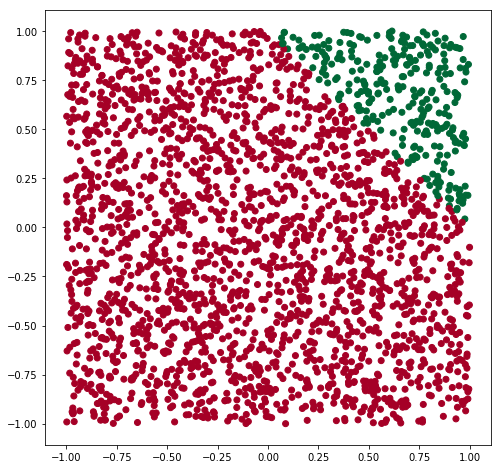

In [5]:
# Plot the test data in a graph for visualization
plt.figure(figsize=(8,8))

plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap="RdYlGn")

plt.show()

# Build the Network

This is the only thing that you need to fill out in this task. Replace all the ... with a code.

In [6]:
tf.reset_default_graph()
# Create label placeholder
y = tf.placeholder(shape=[None], dtype=tf.float32, name="y")
print("y = ", y)

# Create the input layer
X      = tf.placeholder(shape=[None,2], dtype=tf.float32, name="x") # use tf.placeholder. Shape: [None,2]
print("x = ", X)

# Create weights and biases (with random initial values)

# weight is random variables
W      = tf.Variable(tf.random_uniform(([2,1]),-1.0,1.0)) # use tf.Variable. Shape: [2,1]
print("W = ", W)

# bias is only zeros
b      = tf.Variable(tf.zeros([1])) # use tf.Variable
print("b = ", b)

# Create the output of the network
a = tf.squeeze((tf.matmul(X,W) + b), [1], name = "a") # a = X*w + b
print("a = ", a)

#a = tf.squeeze(a)
#print("a after squeeze = ", a)

y_pred = tf.math.tanh(a, name = "y_pred") # y_pred = tanh(a). Carefull: You need to remove one dimension from a using tf.squeeze, 
             # since we want y_pred to have the same shape as y
             # You can test the shape of 'a' and 'y' using print(a) and print(y)

y =  Tensor("y:0", shape=(?,), dtype=float32)
x =  Tensor("x:0", shape=(?, 2), dtype=float32)
W =  <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32_ref>
b =  <tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>
a =  Tensor("a:0", shape=(?,), dtype=float32)


If everything has been done correctl, the following line shoult output something similar to:

$\text{<tf.Tensor 'y_pred:0' shape=(?,) dtype=float32>}$

In [7]:
y_pred

<tf.Tensor 'y_pred:0' shape=(?,) dtype=float32>

# Define Loss and Accuracy Function

In [15]:
# squared here so it will not be negative
loss               = tf.reduce_mean((y_pred-y)*(y_pred-y),name="loss")

y_pred_group       = tf.cast(y_pred>0.5,dtype=tf.float32,name="y_pred_group")

correct            = tf.equal((y_pred_group*2 - 1),y, name="correct")
accuracy           = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")

optimizer          = tf.train.AdamOptimizer()
training_optimizer = optimizer.minimize(loss, name="training_optimizer")

init = tf.global_variables_initializer()
saver = tf.train.Saver()

Here, we are defining, how the network should be trained. Please look at the tensorflow website to understand, how this works.

# Train the Network

It is time to train the network now. The code has been adapted from here:
    
https://github.com/ageron/handson-ml

In [16]:
n_epochs                = 100
batch_size              = 128

n_iterations_per_epoch  = y_train.shape[0] // batch_size
n_iterations_validation = y_test.shape[0] // batch_size
best_loss_val           = np.infty

checkpoint_path = "./Task_2_network"

with tf.Session() as sess:
    init.run()

    for epoch in range(n_epochs):
        for iteration in range(n_iterations_per_epoch):
            X_batch = X_train[iteration*batch_size:(iteration+1)*batch_size,:]
            y_batch = y_train[iteration*batch_size:(iteration+1)*batch_size]
            
            # Run the training operation and measure the loss:
            _, loss_train = sess.run(
                [training_optimizer, loss],
                feed_dict={X: X_batch, y: y_batch })

        # At the end of each epoch,
        # measure the validation loss and accuracy:
        loss_vals = []
        acc_vals = []
        for iteration in range(n_iterations_validation):
            X_batch = X_test[iteration*batch_size:(iteration+1)*batch_size,:]
            y_batch = y_test[iteration*batch_size:(iteration+1)*batch_size]
            loss_val, acc_val = sess.run(
                [loss, accuracy],
                feed_dict={X: X_batch,y: y_batch})
            loss_vals.append(loss_val)
            acc_vals.append(acc_val)
        loss_val = np.mean(loss_vals)
        acc_val = np.mean(acc_vals)
        print("\rEpoch: {}  Val accuracy: {:.4f}%  Loss: {:.6f}{}".format(
            epoch+1, acc_val * 100, loss_val,
            " (improved)" if loss_val < best_loss_val else ""))

        # And save the model if it improved:
        if loss_val < best_loss_val:
            save_path = saver.save(sess, checkpoint_path)
            best_loss_val = loss_val

Epoch: 1  Val accuracy: 82.1957%  Loss: 1.137429 (improved)
Epoch: 2  Val accuracy: 84.4984%  Loss: 1.029021 (improved)
Epoch: 3  Val accuracy: 86.8010%  Loss: 0.930398 (improved)
Epoch: 4  Val accuracy: 87.6234%  Loss: 0.842271 (improved)
Epoch: 5  Val accuracy: 88.0345%  Loss: 0.764439 (improved)
Epoch: 6  Val accuracy: 88.0345%  Loss: 0.696281 (improved)
Epoch: 7  Val accuracy: 88.0345%  Loss: 0.637058 (improved)
Epoch: 8  Val accuracy: 88.0345%  Loss: 0.585988 (improved)
Epoch: 9  Val accuracy: 88.0345%  Loss: 0.542226 (improved)
Epoch: 10  Val accuracy: 88.0345%  Loss: 0.504857 (improved)
Epoch: 11  Val accuracy: 88.0345%  Loss: 0.472934 (improved)
Epoch: 12  Val accuracy: 88.0345%  Loss: 0.445546 (improved)
Epoch: 13  Val accuracy: 88.0345%  Loss: 0.421875 (improved)
Epoch: 14  Val accuracy: 88.0345%  Loss: 0.401221 (improved)
Epoch: 15  Val accuracy: 88.0345%  Loss: 0.383015 (improved)
Epoch: 16  Val accuracy: 88.0345%  Loss: 0.366803 (improved)
Epoch: 17  Val accuracy: 88.0345%

If everything works correctly, the Loss function should be smaller than 0.1. 

TODO: The accuracy is not working properly. Can you fix it?

# Prediction

In [10]:
with tf.Session() as sess:
    saver.restore(sess, checkpoint_path)
    y_pred_value = sess.run(
            [y_pred],
            feed_dict={X: X_test,
                       y: np.zeros((X_test.shape[0]), dtype=np.float32)})
    y_pred_value = y_pred_value[0]

INFO:tensorflow:Restoring parameters from ./Task_2_network


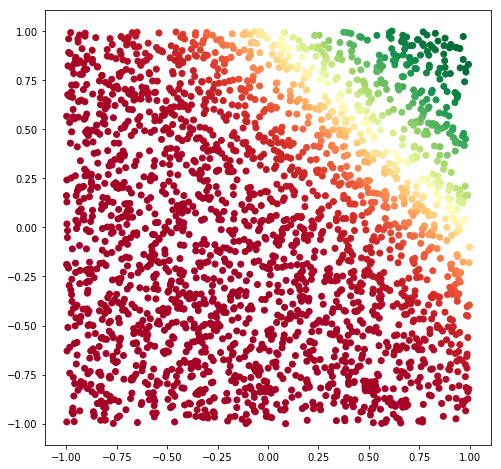

In [11]:
# Plot the test data in a graph for visualization
plt.figure(figsize=(8,8))

plt.scatter(X_test[:,0],X_test[:,1],c=y_pred_value,cmap="RdYlGn")

plt.show()

In [69]:
# This command should output something very close to [-1,1]. Otherwise there was no convergence.
print([np.min(y_pred_value),np.max(y_pred_value)])

[-0.9999838, 0.9536338]
